<a href="https://colab.research.google.com/github/Void-Brain70/Machine_Learning/blob/main/multivariable_linear_regression_withSK_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model

In [29]:
df = pd.read_csv("/content/car driving risk analysis.csv")
df

,speed,car_age,experience,risk
0,200,15,5.0,85
1,90,17,13.0,20
2,165,12,4.0,93
3,110,20,NaN,60
4,140,5,3.0,82
5,115,2,8.0,10


In [30]:
df.experience

0     5.0
1    13.0
2     4.0
3     NaN
4     3.0
5     8.0
Name: experience, dtype: float64

In [31]:
#df.experience.mean()
exp_fit = df.experience.median()
exp_fit

5.0

In [32]:
df.experience = df.experience.fillna(exp_fit)
df.experience

0     5.0
1    13.0
2     4.0
3     5.0
4     3.0
5     8.0
Name: experience, dtype: float64

In [33]:
df.describe()

,speed,car_age,experience,risk
count,6.000000,6.000000,6.000000,6.000000
mean,136.666667,11.833333,6.333333,58.333333
std,40.455737,7.026142,3.669696,35.443852
min,90.000000,2.000000,3.000000,10.000000
25%,111.250000,6.750000,4.250000,30.000000
50%,127.500000,13.500000,5.000000,71.000000
75%,158.750000,16.500000,7.250000,84.250000
max,200.000000,20.000000,13.000000,93.000000


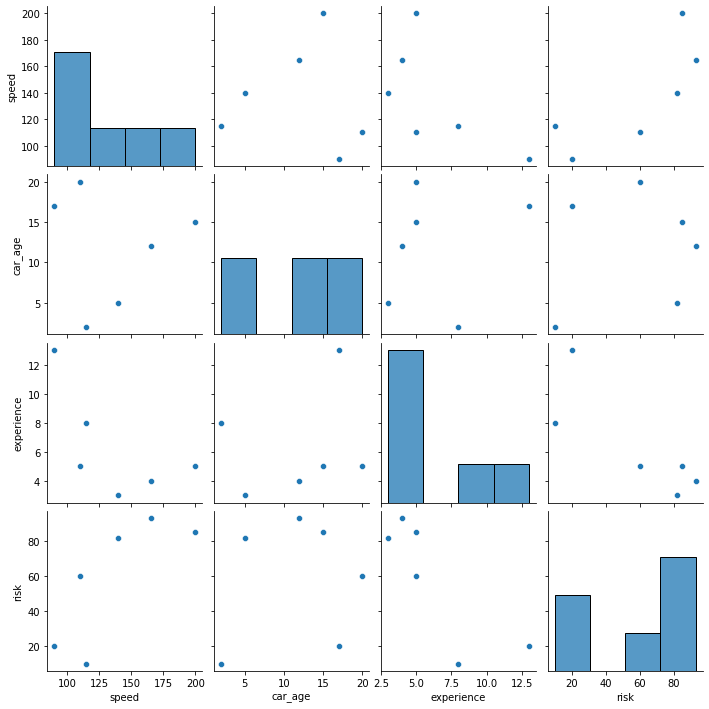

In [34]:
sns.pairplot(df)
plt.show()

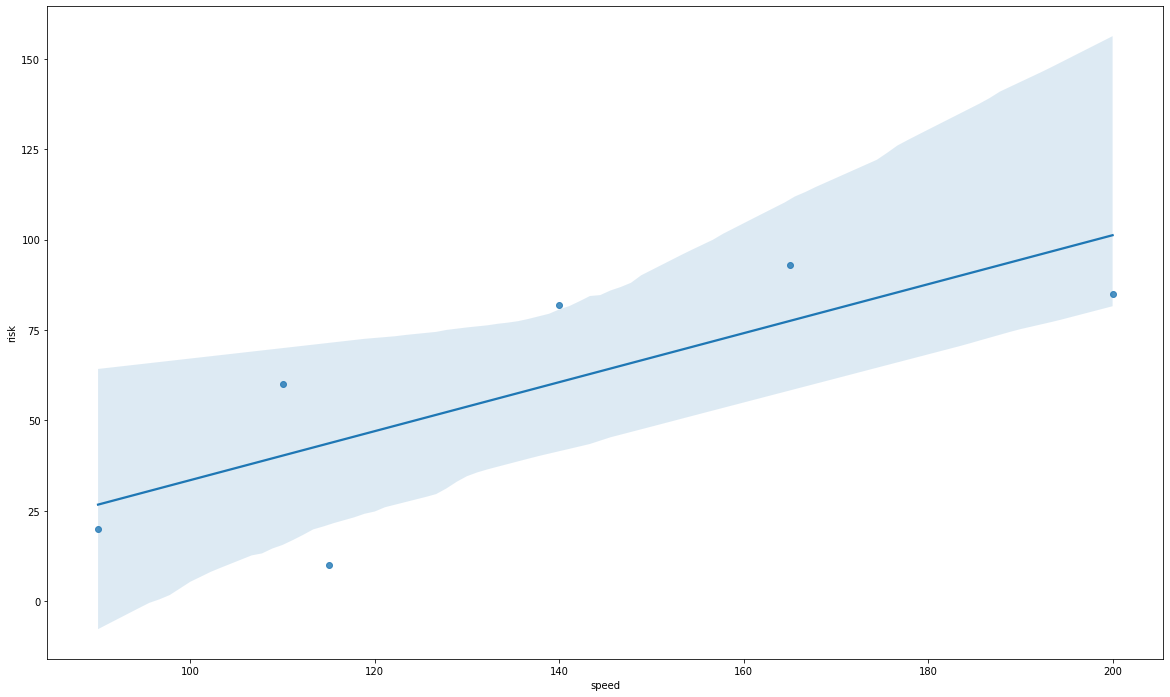

In [35]:
plt.figure(figsize=(20, 12))
sns.regplot(x = 'speed', y = 'risk', data = df)
plt.show()

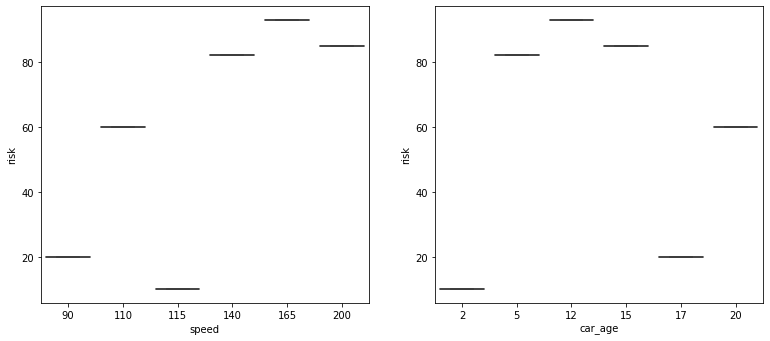

In [36]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,2)
sns.boxplot(x = 'speed', y = 'risk', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'car_age', y = 'risk', data = df)
plt.show()

In [37]:
X=df[['speed','car_age','experience']]
y=df['risk']

In [49]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [50]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
speed,0.323270
car_age,0.818851
experience,-12.292342


In [53]:
y_pred=reg.predict(X_test)

In [54]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
1,20,-47.260677
2,93,83.521355


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [65]:
df_train.head()

,Actual,Predicted
5,10,54.168279


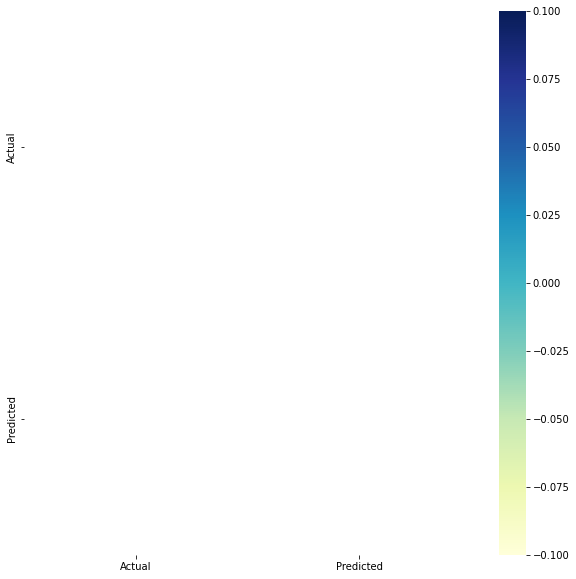

In [66]:
plt.figure(figsize=[10,10])
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [68]:
y_pred=reg.predict([[160,10,5]])
y_pred

array([67.97496318])

In [14]:
reg = linear_model.LinearRegression()

In [15]:
reg.fit(df[['speed','car_age','experience']],df.risk)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
reg.predict([[160,10,5]])

array([76.43133462])

In [17]:
reg.coef_

array([ 0.33059217,  1.61053246, -6.20772074])

In [18]:
reg.intercept_

33.4100009104359

In [19]:
#risk = M1*speed+ M2*car_age+M3*experience+intercept
risk = 0.33059217*160+1.61053246*10+-6.20772074*5+33.4100009104359
risk

71.3714690104359